In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [5]:
resp = nsfg.ReadFemResp()

In [6]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


The column 'numkdhh' represents the number of children under the age of 18.  Here is that number for the first few responses.

In [7]:
resp['numkdhh'].head()

0    3
1    0
2    0
3    0
4    0
Name: numkdhh, dtype: int64

To get the actual/ unbiased pmf and its mean, we use the thinkstats2.Pmf function defined by the author

In [19]:
pmf = thinkstats2.Pmf(resp['numkdhh'],label='Actual')
print(pmf)
print('unbiased mean: ', pmf.Mean())

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318})
unbiased mean:  1.024205155043831


The author also provides a function to derive the biased pmf given the actual pmf:

In [20]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Using the above function we calculate the biased pmf and its mean

In [21]:
biased_pmf = BiasPmf(pmf, label='Observed')
print(biased_pmf)
print('biased mean: ', biased_pmf.Mean())

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166})
biased mean:  2.403679100664282


We then use the author's thinkplot function to plot the actual vs biased pmf distributions below:

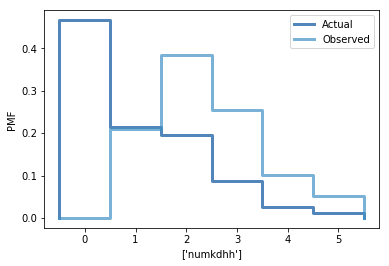

In [22]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel=['numkdhh'], ylabel='PMF')